# Project Solution
### 1.  Import the Necessary Packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
import time
%matplotlib inline

### 2. Instantiate the Environment and Agent

In [2]:
env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Train the Agent with DQN

Episode 100	Average Score: 1.00	00:01:07
Episode 200	Average Score: 4.53	00:02:14
Episode 300	Average Score: 8.04	00:03:23
Episode 400	Average Score: 10.55	00:04:32
Episode 500	Average Score: 13.28	00:05:41
Episode 600	Average Score: 13.33	00:06:50
Episode 700	Average Score: 13.91	00:07:59
Episode 785	Average Score: 15.03	00:08:58
Environment solved in 685 episodes!	Average Score: 15.03


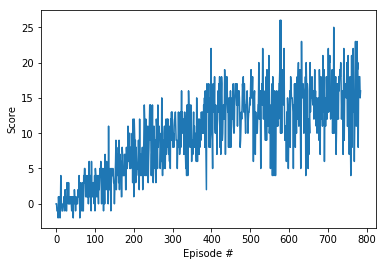

In [3]:
from dqn_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, seed=0)

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    start = time.time()
    
    for i_episode in range(1, n_episodes+1):
        #state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0] 
        score = 0
        while True:
            action = agent.act(state, eps)
            #next_state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0] 
    
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        current = time.time()
        elapsed = current - start
        elapsed_str = time.strftime("%H:%M:%S", time.gmtime(elapsed))
        print('\rEpisode {}\tAverage Score: {:.2f}\t{}'.format(i_episode, np.mean(scores_window), elapsed_str), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\t{}'.format(i_episode, np.mean(scores_window), elapsed_str))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            break
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
    return scores

dqn_scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(dqn_scores)), dqn_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 3.1. Train the Agent with Double DQN

Episode 100	Average Score: 0.96	00:01:10
Episode 200	Average Score: 3.86	00:02:21
Episode 300	Average Score: 7.24	00:03:33
Episode 400	Average Score: 10.92	00:04:46
Episode 500	Average Score: 13.40	00:05:59
Episode 600	Average Score: 14.49	00:07:12
Episode 638	Average Score: 15.05	00:07:40
Environment solved in 538 episodes!	Average Score: 15.05


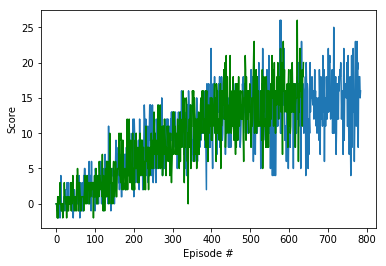

In [4]:
from double_dqn_agent import DDQNAgent

agent = DDQNAgent(state_size=state_size, action_size=action_size, seed=0)

def double_dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    start = time.time()
    
    for i_episode in range(1, n_episodes+1):
        #state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0] 
        score = 0
        while True:
            action = agent.act(state, eps)
            #next_state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0] 
    
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        current = time.time()
        elapsed = current - start
        elapsed_str = time.strftime("%H:%M:%S", time.gmtime(elapsed))
        print('\rEpisode {}\tAverage Score: {:.2f}\t{}'.format(i_episode, np.mean(scores_window), elapsed_str), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\t{}'.format(i_episode, np.mean(scores_window), elapsed_str))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            break
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_doubledqn.pth')
    return scores

ddqn_scores = double_dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(dqn_scores)), dqn_scores)
plt.plot(np.arange(len(ddqn_scores)), ddqn_scores, color='green')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 3.2. Train the Agent with Duel Double DQN

Episode 100	Average Score: 0.59	00:01:24
Episode 200	Average Score: 3.59	00:02:49
Episode 300	Average Score: 8.38	00:04:14
Episode 400	Average Score: 9.19	00:05:40
Episode 500	Average Score: 12.50	00:07:07
Episode 600	Average Score: 14.08	00:08:33
Episode 624	Average Score: 15.02	00:08:53
Environment solved in 524 episodes!	Average Score: 15.02


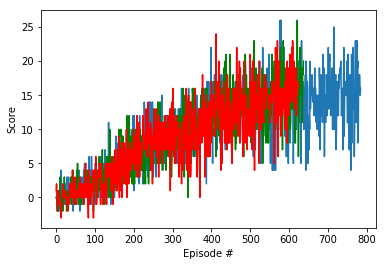

In [5]:
from duel_double_dqn_agent import DuelDDQNAgent

agent = DuelDDQNAgent(state_size=state_size, action_size=action_size, seed=0)

def duel_double_dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    start = time.time()
    
    for i_episode in range(1, n_episodes+1):
        #state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0] 
        score = 0
        while True:
            action = agent.act(state, eps)
            #next_state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0] 
    
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        current = time.time()
        elapsed = current - start
        elapsed_str = time.strftime("%H:%M:%S", time.gmtime(elapsed))
        print('\rEpisode {}\tAverage Score: {:.2f}\t{}'.format(i_episode, np.mean(scores_window), elapsed_str), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\t{}'.format(i_episode, np.mean(scores_window), elapsed_str))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            break
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_dueldoubledqn.pth')
    return scores

duel_ddqn_scores = duel_double_dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(dqn_scores)), dqn_scores)
plt.plot(np.arange(len(ddqn_scores)), ddqn_scores, color='green')
plt.plot(np.arange(len(duel_ddqn_scores)), duel_ddqn_scores, color='red')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 3.3. Train the Agent with Prioritized Duel Double DQN

Episode 100	Average Score: 0.65	00:01:36
Episode 200	Average Score: 2.34	00:03:30
Episode 300	Average Score: 4.91	00:05:40
Episode 400	Average Score: 6.91	00:08:04
Episode 500	Average Score: 9.04	00:10:29
Episode 600	Average Score: 10.48	00:12:53
Episode 700	Average Score: 10.61	00:15:18
Episode 800	Average Score: 11.40	00:17:43
Episode 900	Average Score: 12.34	00:20:08
Episode 1000	Average Score: 13.57	00:22:33
Episode 1100	Average Score: 13.83	00:24:57
Episode 1200	Average Score: 13.67	00:27:22
Episode 1300	Average Score: 14.40	00:29:46
Episode 1348	Average Score: 15.06	00:30:56
Environment solved in 1248 episodes!	Average Score: 15.06


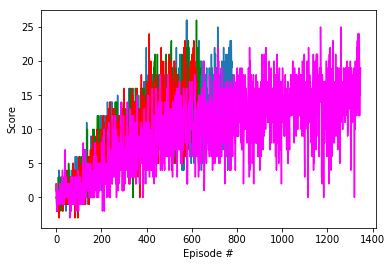

In [6]:
from prio_duel_double_dqn_agent import PrioDuelDDQNAgent

agent = PrioDuelDDQNAgent(state_size=state_size, action_size=action_size, seed=0)

def prio_duel_double_dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    start = time.time()
    
    for i_episode in range(1, n_episodes+1):
        #state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0] 
        score = 0
        while True:
            action = agent.act(state, eps)
            #next_state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0] 
    
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        current = time.time()
        elapsed = current - start
        elapsed_str = time.strftime("%H:%M:%S", time.gmtime(elapsed))
        print('\rEpisode {}\tAverage Score: {:.2f}\t{}'.format(i_episode, np.mean(scores_window), elapsed_str), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\t{}'.format(i_episode, np.mean(scores_window), elapsed_str))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            break
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_priodueldoubledqn.pth')
    return scores

prio_duel_ddqn_scores = prio_duel_double_dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(dqn_scores)), dqn_scores)
plt.plot(np.arange(len(ddqn_scores)), ddqn_scores, color='green')
plt.plot(np.arange(len(duel_ddqn_scores)), duel_ddqn_scores, color='red')
plt.plot(np.arange(len(prio_duel_ddqn_scores)), prio_duel_ddqn_scores, color='magenta')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In [11]:
# load the weights from file
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

#agent = DDQNAgent(state_size=state_size, action_size=action_size, seed=0)
#agent.qnetwork_local.load_state_dict(torch.load('checkpoint_doubledqn.pth'))

#agent = DuelDDQNAgent(state_size=state_size, action_size=action_size, seed=0)
#agent.qnetwork_local.load_state_dict(torch.load('checkpoint_dueldoubledqn.pth'))

#agent = PrioDuelDDQNAgent(state_size=state_size, action_size=action_size, seed=0)
#agent.qnetwork_local.load_state_dict(torch.load('checkpoint_priodueldoubledqn.pth'))

scores_window = deque(maxlen=100)

start = time.time()

for i_episode in range(3):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0
    while True:
        action = agent.act(state)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]
        score += reward
        state = next_state 
        if done:
            break
    scores_window.append(score)       # save most recent score
    
    current = time.time()
    elapsed = current - start
    elapsed_str = time.strftime("%H:%M:%S", time.gmtime(elapsed))
    print('\rEpisode {}\tAverage Score: {:.2f}\t{}'.format(i_episode, np.mean(scores_window), elapsed_str))


Episode 0	Average Score: 9.00	00:00:30
Episode 1	Average Score: 14.00	00:01:00
Episode 2	Average Score: 12.33	00:01:30


In [12]:
env.close()